# Project:10 K Nearest Neighbors on Breast Cancer Data

### Problem Statement

Breast cancer is one of the most common cancers among women in the world. Early detection of breast cancer is essential in reducing their life losses.

We are going to build a predictive model using machine learning algorithms KNN to predict whether the tumor is benign or malignant. 

### Data Description

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. The mean, standard error and "worst" of these features were computed for each image, resulting in 30 features.

1) ID number

2) Diagnosis (M = malignant, B = benign)

##### Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values) 
- perimeter 
- area 
- smoothness (local variation in radius lengths) 
- compactness (perimeter^2 / area - 1.0) 
- concavity (severity of concave portions of the contour) 
- concave points (number of concave portions of the contour) 
- symmetry 
- fractal dimension ("coastline approximation" - 1)



# Importing Required Packages

In [1]:
#Loading Relevant Packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Check out the data

In [2]:
#Load the dataset
df = pd.read_csv("cancerdata.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,...,25.38,17.33,184.60,2019.0,0.1622,0.134597,0.7119,0.120681,0.4601,0.101594
1,842517,M,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,...,24.99,23.41,158.80,1956.0,0.1238,0.529227,0.2416,0.035439,0.2750,0.079397
2,84300903,M,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,...,23.57,25.53,152.50,1709.0,0.1444,0.166906,0.4504,0.149670,0.3613,0.088802
3,84348301,M,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,...,14.91,26.50,98.87,567.7,0.2098,0.224998,0.6869,0.110799,0.6638,0.086210
4,84358402,M,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,...,22.54,16.67,152.20,1575.0,0.1374,0.075833,0.4000,0.126386,0.2364,0.087483


In [4]:
# removing id and unnamed columns
df = df.drop(['id'],axis = 1)

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,0.150053,...,25.38,17.33,184.60,2019.0,0.1622,0.134597,0.7119,0.120681,0.4601,0.101594
1,M,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,0.213798,...,24.99,23.41,158.80,1956.0,0.1238,0.529227,0.2416,0.035439,0.2750,0.079397
2,M,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,0.222581,...,23.57,25.53,152.50,1709.0,0.1444,0.166906,0.4504,0.149670,0.3613,0.088802
3,M,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,0.179685,...,14.91,26.50,98.87,567.7,0.2098,0.224998,0.6869,0.110799,0.6638,0.086210
4,M,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,0.147534,...,22.54,16.67,152.20,1575.0,0.1374,0.075833,0.4000,0.126386,0.2364,0.087483


In [6]:
#To get dimension of dataset
df.shape

(569, 31)

In [7]:
#check data types
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_wors           float64
concavity_worst            float64
concave points_worst

In [8]:
#info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
#check for null values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_wors           0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

No missing values present in the dataset

# Summary Statistics

In [10]:
#to get summary statistics of data
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.157073,19.025699,91.969033,654.889104,0.095887,0.106397,0.092388,0.048655,0.179979,0.063291,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.243948,0.272188,0.122288,0.290076,0.082584
std,3.435295,4.515361,24.298981,351.914129,0.013778,0.051773,0.082573,0.042227,0.026742,0.006770,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.156127,0.208624,0.064848,0.061867,0.018546
min,2.174108,5.225685,43.790000,143.500000,0.045915,-0.055431,-0.156186,-0.078615,0.103582,0.041265,...,7.930000,12.020000,50.410000,185.200000,0.071170,-0.198310,0.000000,-0.133583,0.156500,0.031090
25%,11.762811,15.926529,75.170000,420.300000,0.085801,0.070217,0.037784,0.020214,0.162974,0.058996,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.130946,0.114500,0.077446,0.250400,0.068561
50%,14.142920,19.135095,86.240000,551.100000,0.096244,0.105569,0.093832,0.048666,0.179796,0.062821,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.237884,0.226700,0.120702,0.282200,0.082181
75%,16.403557,22.060029,104.100000,782.700000,0.105867,0.143065,0.148154,0.077010,0.198569,0.067782,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.345980,0.382900,0.162843,0.317900,0.094202
max,24.961616,31.692291,188.500000,2501.000000,0.144596,0.248430,0.335120,0.189527,0.261135,0.087951,...,36.040000,49.540000,251.200000,4254.000000,0.222600,0.693251,1.252000,0.313149,0.663800,0.140263


Summary of statistics we can see that features with large scale have larger statistics and features with small scale has lower statistics so we need to bring them on same scale to reduce the oversahdow effect of features with large scale over small scale features.

# Standardize the Variables

KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it. The scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on small scale.

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(df.drop("diagnosis", axis = 1))

StandardScaler()

In [14]:
scaled_feature = scaler.transform(df.drop("diagnosis", axis = 1))

In [15]:
#columns name
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_wors',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [16]:
data = pd.DataFrame(scaled_feature, columns=[ 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_wors',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'])

In [17]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.013881,0.260882,1.269934,0.984375,0.016434,-0.327064,1.119732,1.134648,-1.120050,-0.521553,...,1.886690,-1.359293,2.303601,2.001237,1.307686,-0.701018,2.109526,-0.024805,2.750622,1.025937
1,1.260512,0.762178,1.685955,1.908708,-0.104871,-0.833161,-0.066185,-0.652919,1.265773,1.715722,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,1.828835,-0.146749,-1.340454,-0.243890,-0.171962
2,0.396013,-0.167180,1.566503,1.558884,-1.456150,-0.909003,0.489096,0.087740,1.594474,-0.969961,...,1.511870,-0.023974,1.347475,1.456285,0.527407,-0.493896,0.854974,0.422629,1.152255,0.335611
3,0.403088,1.891747,-0.592687,-0.764464,-0.316835,-0.355227,1.237301,-0.895001,-0.011010,0.670090,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,-0.121482,1.989588,-0.177328,6.046041,0.195711
4,-0.044249,-1.628685,1.776573,1.826229,-0.224964,-1.851124,-0.749924,-0.256612,-1.214339,1.025913,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-1.077736,0.613179,0.063246,-0.868353,0.264407


# Data Visualization

<AxesSubplot:xlabel='diagnosis', ylabel='texture_mean'>

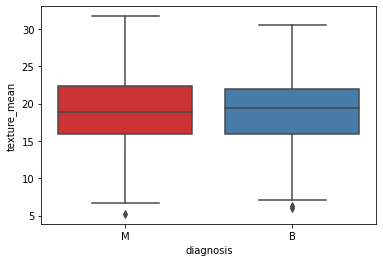

In [18]:
#Boxplot of Diagnosis by texture_mean
sns.boxplot(x="diagnosis", y="texture_mean", data=df, palette ="Set1")

<AxesSubplot:xlabel='diagnosis', ylabel='perimeter_mean'>

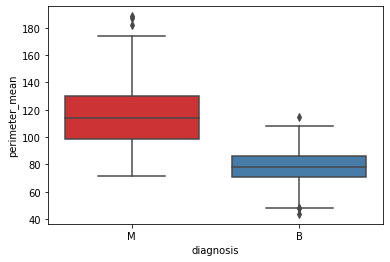

In [19]:
#Boxplot of Diagnosis by perimeter_mean
sns.boxplot(x="diagnosis", y="perimeter_mean", data=df, palette = "Set1")

<AxesSubplot:xlabel='diagnosis', ylabel='area_mean'>

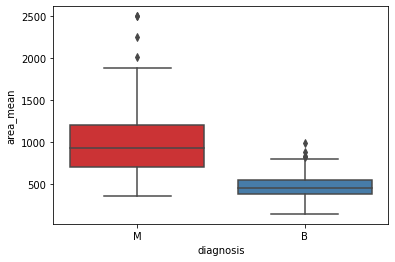

In [20]:
#Boxplot of Diagnosis by area_mean
sns.boxplot(x="diagnosis", y="area_mean", data=df, palette="Set1")

<AxesSubplot:xlabel='diagnosis', ylabel='smoothness_mean'>

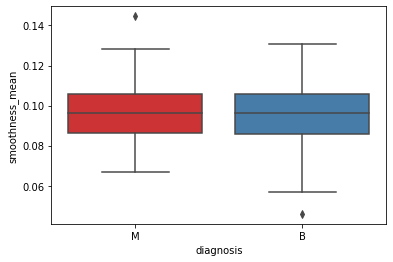

In [21]:
#Boxplot of Diagnosis by smoothness_mean
sns.boxplot(x="diagnosis", y="smoothness_mean", data=df, palette="Set1")

<AxesSubplot:xlabel='diagnosis', ylabel='perimeter_se'>

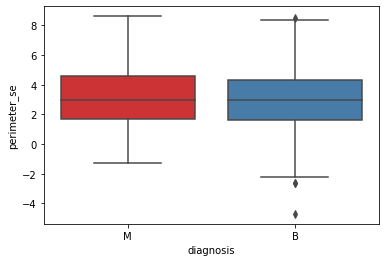

In [22]:
#Boxplot of Diagnosis by Perimeter_se
sns.boxplot(x="diagnosis", y="perimeter_se", data=df, palette="Set1")

# Convert diagnosis value of M and B to a numerical value

In [23]:
# change M & B
def diagnosis_value(diagnosis):
    if diagnosis == 'M':
        return 1
    else:
        return 0
    
df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)   

# Splitting the data: Training and Test

In [73]:
#Train-Test-Split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data,df['diagnosis'], test_size = 0.33, random_state = 42)

# KNN implementation

Now we are fitting KNN algorith on training data, predicting labels for dataset and printing the accuracy of the model for differentr values of K

In [74]:
from sklearn.neighbors import KNeighborsClassifier

#first we are starting with K=1
knn = KNeighborsClassifier(n_neighbors=1)

In [75]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [76]:
pred = knn.predict(x_test)

# Predictions and Evaluations

Now evaluating our KNN model

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score 

In [78]:
print(confusion_matrix(y_test,pred))

[[110  11]
 [  8  59]]


In [79]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       121
           1       0.84      0.88      0.86        67

    accuracy                           0.90       188
   macro avg       0.89      0.89      0.89       188
weighted avg       0.90      0.90      0.90       188



With K=1 we get precision 93% and Recall value as 91% but it will lead underfitting with K=1. With K=1 it is difficult to predict so now we will choose optimal value of K with the help of hyper parameter optimization like Cross-Validation. 

# Choose a K value

In [80]:
#Cross-Validation

from sklearn.model_selection import cross_val_score

#Accuracy Rate

accuracy_rate = []

for i in range(1,51,2):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score= cross_val_score(knn,data, df['diagnosis'], cv=10)
    accuracy_rate.append(score.mean())

In [81]:
#Error Rate

error_rate = []

for i in range(1,51,2):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score= cross_val_score(knn,data,df['diagnosis'], cv=10)
    error_rate.append(1-score.mean())

#### Acuuracy Rate vs. K Value

Text(0, 0.5, 'Accuracy Rate')

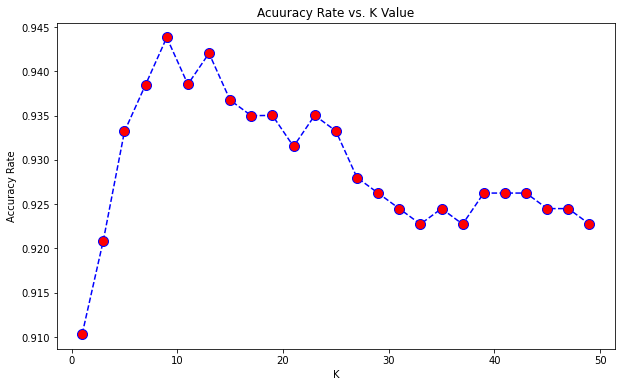

In [82]:
plt.figure(figsize=(10,6))
plt.plot(range(1,51,2),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Acuuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

From above plot we can see that somewhere between K value 9 to 13 we have good accuracy and after K=13, the accuarcy rate has decreased for different value of K.

#### Error Rate vs. K Value

Text(0, 0.5, 'Error Rate')

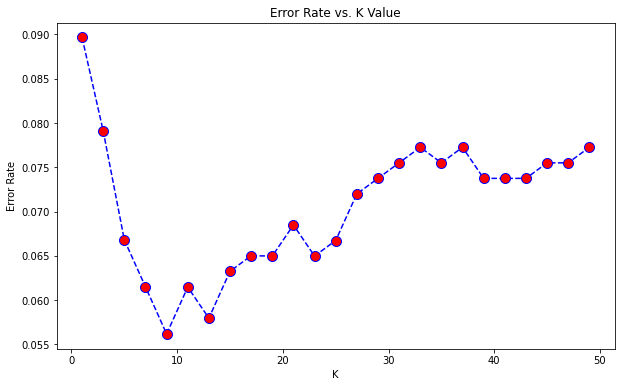

In [83]:
plt.figure(figsize=(10,6))
plt.plot(range(1,51,2),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

This plot confirms that somewhere K=9 has least error rate and after K=13, the error rate has increased.

# Misclassification Error

In [84]:
neighbors=list(range(1,51,2))

In [85]:
# Misclassification error versus k
MSE = [1-x for x in accuracy_rate]

#determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is %d ' %optimal_k)

The optimal number of neighbors is 9 


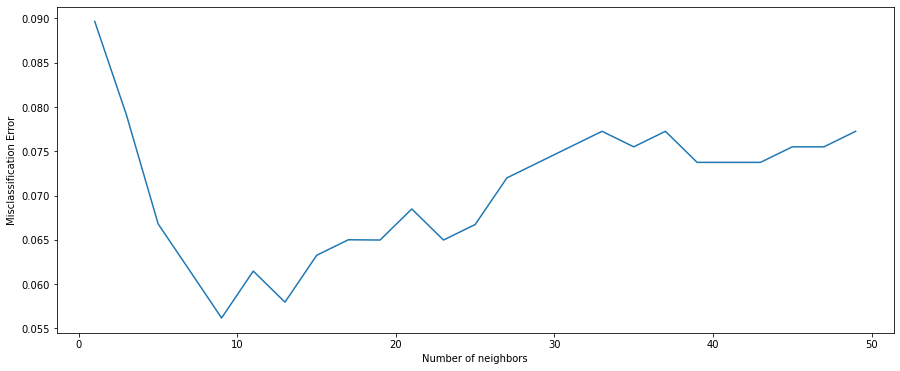

In [86]:
# plot misclassification error versus k
plt.figure(figsize = (15,6))
plt.plot(neighbors, MSE)
plt.xlabel("Number of neighbors")
plt.ylabel("Misclassification Error")
plt.show()

Our optimal k value is 9, from plot we can see that at K=9, we have the least misclassification error.

## Creating KNN model with 9 neighbours and carrying out the final prediction

In [87]:
neigh = KNeighborsClassifier(n_neighbors = 9, weights = 'uniform', algorithm ='auto')

In [88]:
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [89]:
y_pred = neigh.predict(x_test)

In [90]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       121
           1       0.98      0.88      0.93        67

    accuracy                           0.95       188
   macro avg       0.96      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188



In [97]:
print(confusion_matrix(y_test,y_pred))

[[120   1]
 [  8  59]]


In [91]:
#Printing Accuracy
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  95.2127659574468


Our Accuracy for final model with K=9 is 95.21%

### Adding column Prediction on x_test data set

In [93]:
x_test['Prediction'] = y_pred

In [95]:
x_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Prediction
204,0.540794,1.628462,-0.448110,-0.491999,2.075986,-0.334751,-0.661857,1.111034,-1.515821,0.289366,...,-0.168905,-0.333935,-0.356299,0.448503,0.719505,-0.024412,-0.942771,0.183204,2.255961,0
70,-0.009826,-0.536617,1.302886,1.351264,0.185257,1.298257,-0.623106,-0.537832,0.635966,-0.646044,...,0.147012,1.746605,1.732277,-0.572873,-0.832448,-0.016736,1.915873,-0.565828,-1.631428,1
131,-0.010957,-0.378654,0.400820,0.267377,-0.649708,-1.374268,-0.917208,-0.119079,1.133686,-0.049826,...,0.052562,0.525386,0.484159,0.974533,1.408597,0.512911,0.477926,-0.103143,0.108966,1
431,0.063762,0.925391,-0.432457,-0.532101,-1.435760,2.099585,1.321793,-0.577797,0.839363,0.375134,...,-0.450625,-0.525756,-0.641257,0.553709,1.288755,-0.152986,-1.836409,-0.557739,0.133142,0
540,0.904441,0.075298,-0.713374,-0.716683,0.259854,-1.272664,0.281507,0.317797,0.989686,-0.612164,...,-0.976611,-0.848337,-0.743216,0.093432,1.688398,-0.443716,0.556192,-0.924975,-0.206414,0
